In [5]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
TRAIN_DIR = './benign-malignant/train/'
TEST_DIR = './benign-malignant/test/'

CLASS = ['benign', 'malignant']

def BASE_URL(clas, no):
    return cv2.imread(TRAIN_DIR + clas + '/' + os.listdir(TRAIN_DIR + clas)[no])

# Benign

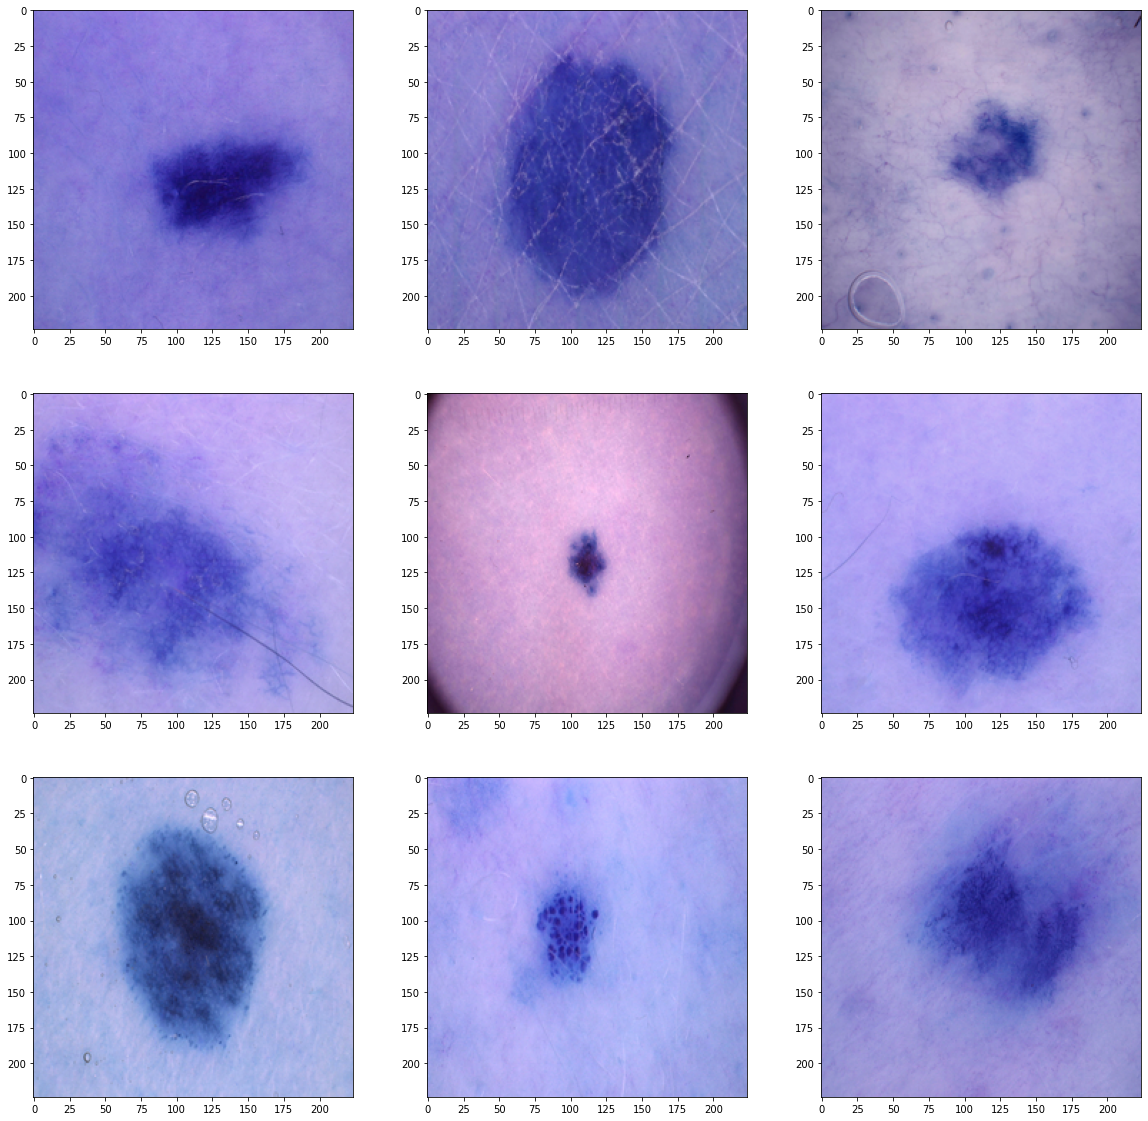

In [26]:
plt.figure(figsize=(20,20))

for i in range(1, 10):
    img = BASE_URL('benign', i)
    plt.subplot(3, 3, i)
    plt.imshow(img)

# Benign after Sharpening

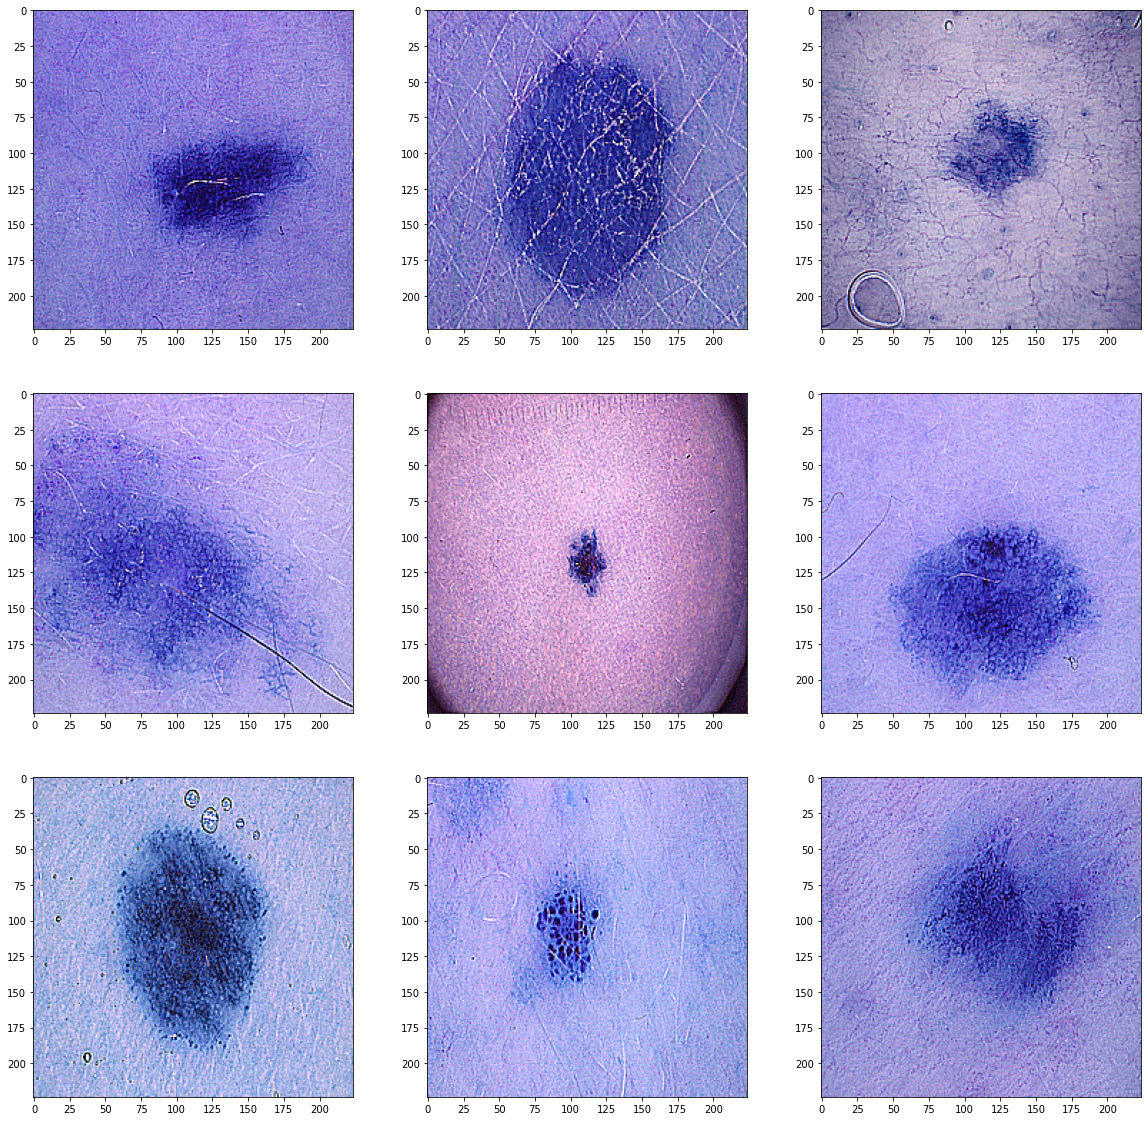

In [25]:
plt.figure(figsize=(20,20))

for i in range(1, 10):
    img = BASE_URL('benign', i)
    plt.subplot(3, 3, i)
    kernel_sharpening = np.array([
                            [-1,-1,-1], 
                            [-1,9,-1], 
                            [-1,-1,-1]])
    new_img = cv2.filter2D(img, -1, kernel_sharpening)
    plt.imshow(new_img)

# Malignant

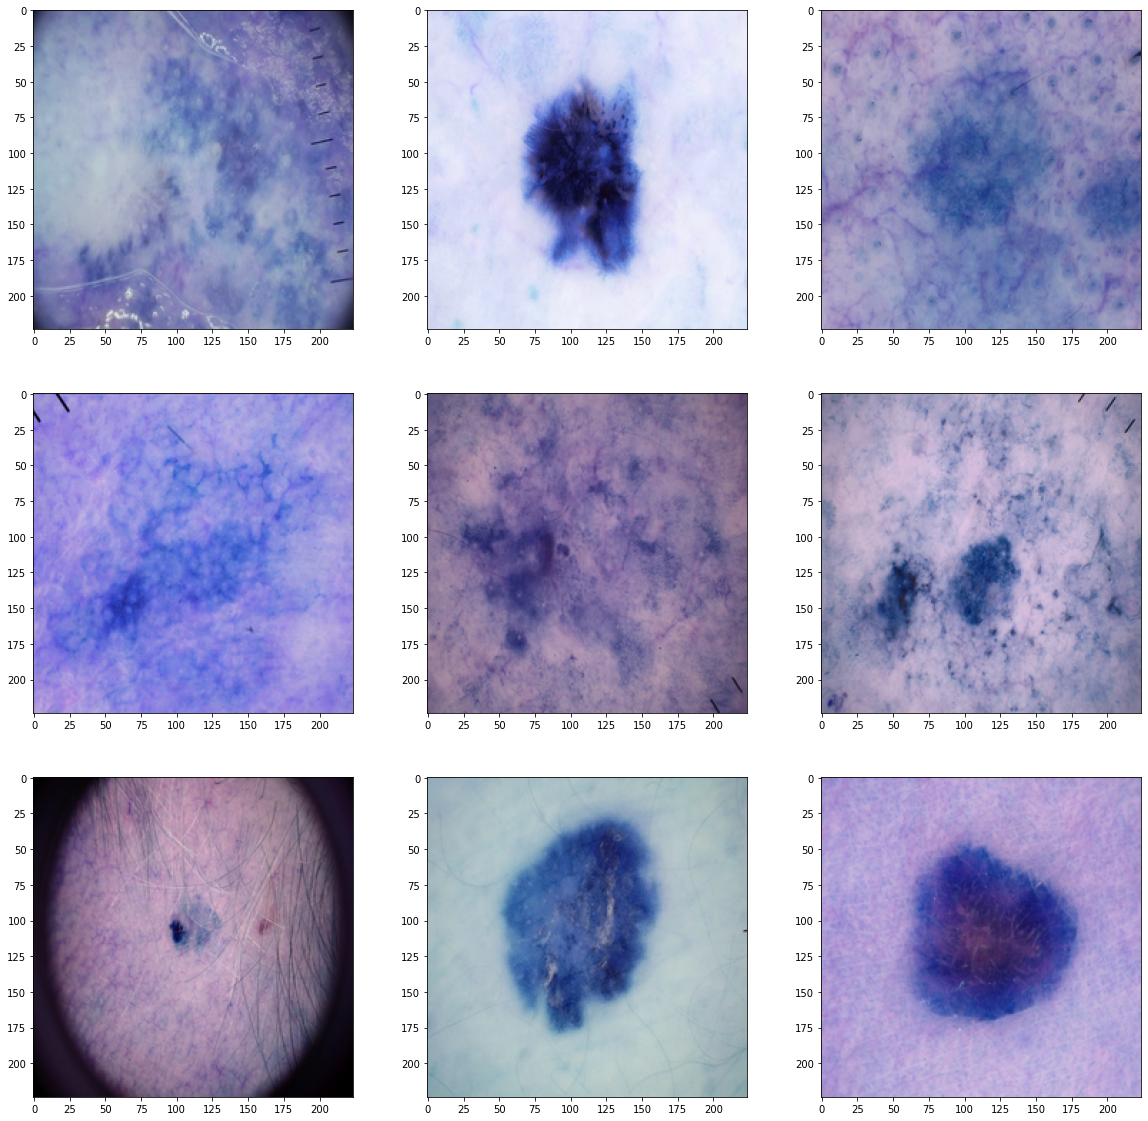

In [29]:
plt.figure(figsize=(20,20))

for i in range(1, 10):
    img = BASE_URL('malignant', i)
    plt.subplot(3, 3, i)
    plt.imshow(img)

# Malignant after Sharpening

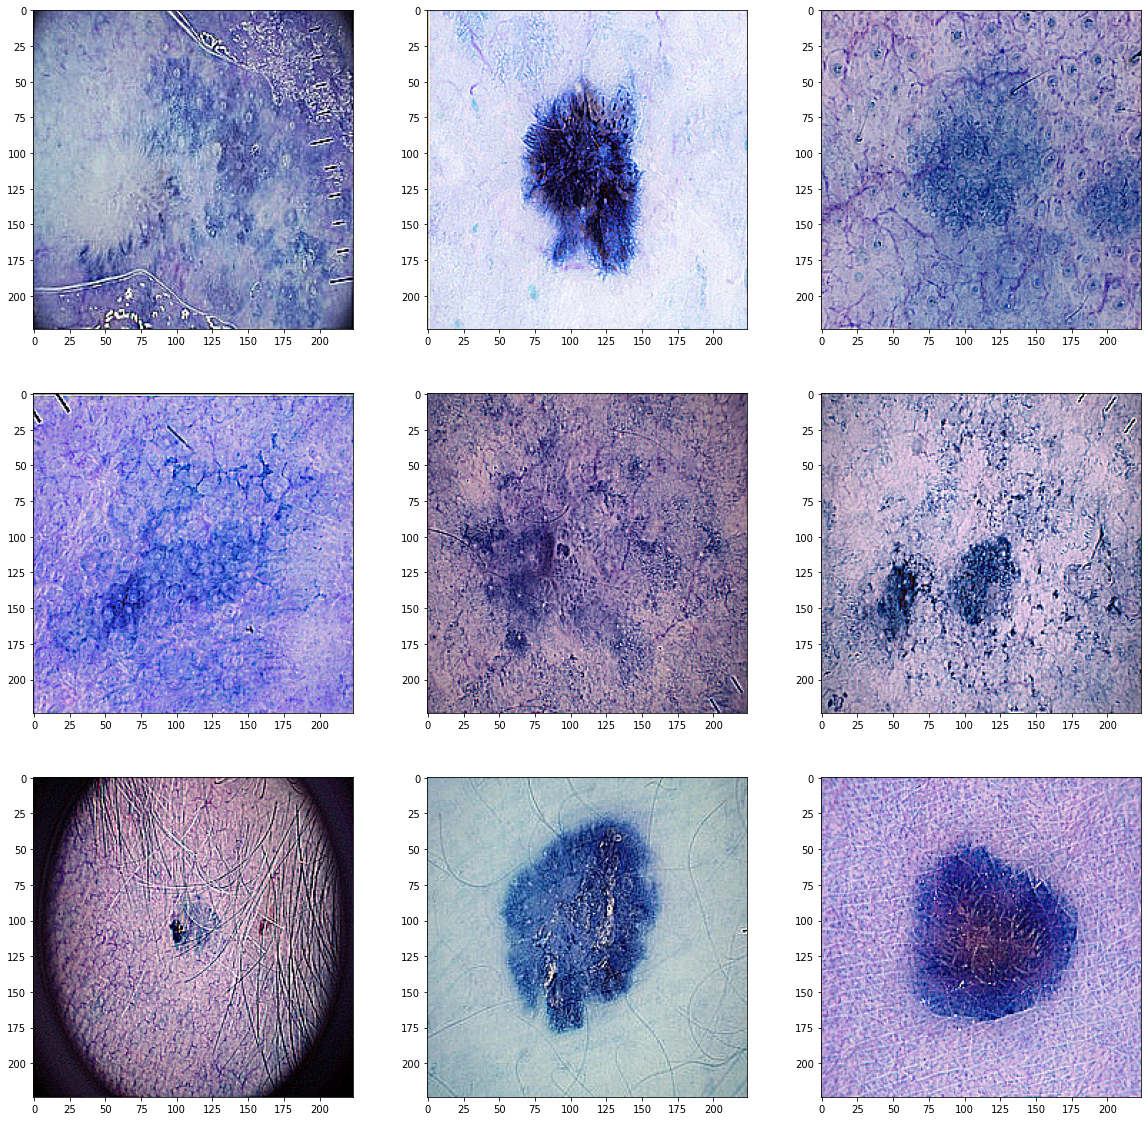

In [30]:
plt.figure(figsize=(20,20))

for i in range(1, 10):
    img = BASE_URL('malignant', i)
    plt.subplot(3, 3, i)
    kernel_sharpening = np.array([
                            [-1,-1,-1], 
                            [-1,9,-1], 
                            [-1,-1,-1]])
    new_img = cv2.filter2D(img, -1, kernel_sharpening)
    plt.imshow(new_img)

In [55]:
# Model without processing
generator = trainGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 50,
    width_shift_range = 2.0,
    height_shift_range = 2.0,    
    shear_range = 0.4,
    zoom_range = 2.0,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

train = generator.flow_from_directory(
    TRAIN_DIR,
    target_size = (225, 225),
    batch_size = 9,
    class_mode = 'binary'
)

val = generator.flow_from_directory(
    TEST_DIR,
    target_size = (225, 225),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [56]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (225, 225, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 223, 223, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [59]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [60]:
history = model.fit(
      train,
      epochs=50,
      validation_data=val
)


Epoch 1/50
293/293 [==============================] - 165s 560ms/step - loss: 0.6573 - accuracy: 0.6602 - val_loss: 0.4931 - val_accuracy: 0.7333
Epoch 2/50
293/293 [==============================] - 159s 543ms/step - loss: 0.5340 - accuracy: 0.7327 - val_loss: 0.5206 - val_accuracy: 0.7167
Epoch 3/50
293/293 [==============================] - 161s 550ms/step - loss: 0.4964 - accuracy: 0.7577 - val_loss: 0.4156 - val_accuracy: 0.7879
Epoch 4/50
293/293 [==============================] - 161s 550ms/step - loss: 0.4665 - accuracy: 0.7725 - val_loss: 0.4725 - val_accuracy: 0.7773
Epoch 5/50
293/293 [==============================] - 160s 547ms/step - loss: 0.4501 - accuracy: 0.7865 - val_loss: 0.4598 - val_accuracy: 0.7576
Epoch 6/50
293/293 [==============================] - 158s 537ms/step - loss: 0.5153 - accuracy: 0.7664 - val_loss: 0.4992 - val_accuracy: 0.7045
Epoch 7/50
293/293 [==============================] - 159s 542ms/step - loss: 0.5110 - accuracy: 0.7543 - val_loss: 0.5065 -